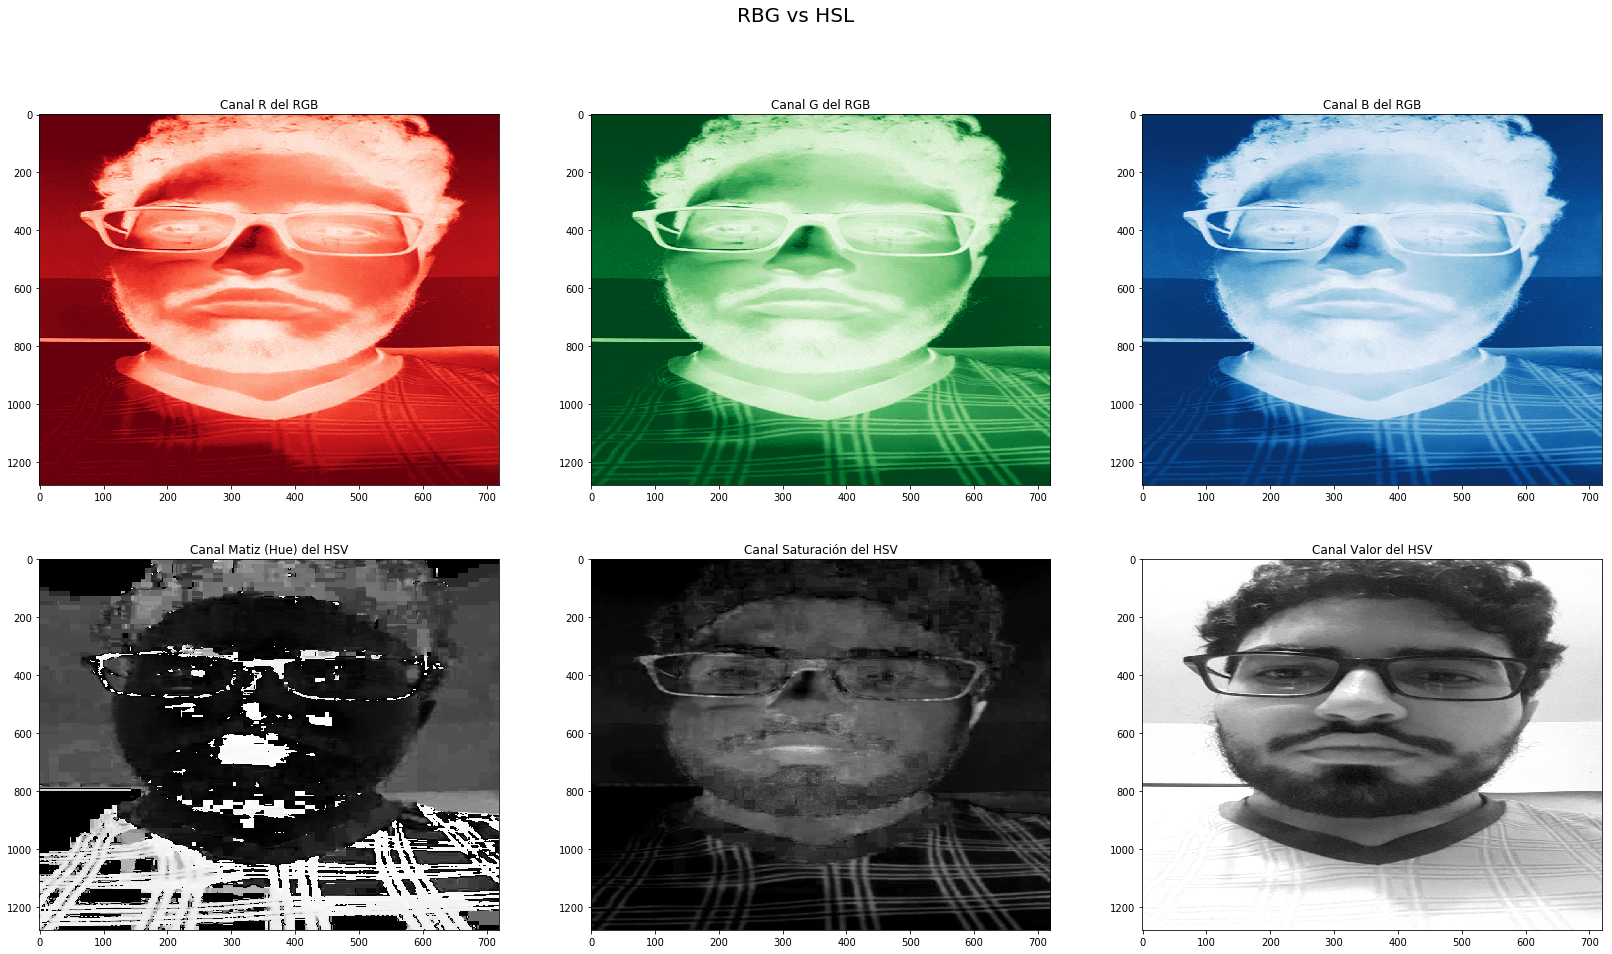

In [27]:
%matplotlib inline 

import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("res/test0.jpeg")
img_t = cv2.cvtColor(img, cv2.COLOR_BGR2HSV_FULL)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(28, 15))
fig.suptitle('RBG vs HSL', fontsize=20)
ax1.set_title('Canal R del RGB')
ax1.imshow(img[:,:,0], cmap='Reds', aspect='auto')
ax2.set_title('Canal G del RGB')
ax2.imshow(img[:,:,1], cmap='Greens', aspect='auto')
ax3.set_title('Canal B del RGB')
ax3.imshow(img[:,:,2], cmap='Blues', aspect='auto')
ax4.set_title('Canal Matiz (Hue) del HSV')
ax4.imshow(img_t[:,:,0], cmap='gray', aspect='auto')
ax5.set_title('Canal Saturación del HSV')
ax5.imshow(img_t[:,:,1], cmap='gray', aspect='auto')
ax6.set_title('Canal Valor del HSV')
ax6.imshow(img_t[:,:,2], cmap='gray', aspect='auto')

In [28]:
def img_read(filename, mode = 'color'):
    if(mode == 'color'):   
        return cv2.cvtColor(cv2.imread(filename),cv2.COLOR_BGR2RGB)
    elif(mode=='grayscale' or mode=='greyscale' or mode == 'gray' or mode == 'grey'):
        return cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    else:
        return None

def printColorImageAndHist(img, maintTitle = '', imgTitle=''):
    fig, arreglo_plots = plt.subplots(1,2, figsize=(15, 4))
    fig.suptitle(maintTitle, fontsize=20)
    colors = ('r','g','b')
    arreglo_plots[0].set_title(imgTitle)
    arreglo_plots[0].imshow(img)
    arreglo_plots[1].set_title('Histograma')
    for i,col in enumerate(colors):
        img_array_i = img[:,:,i].ravel()
        arreglo_plots[1].hist(img_array_i,histtype='step', bins=255, 
                                range=(0.0, 255.0), color=colors[i])
        
def printGrayImageAndHist(img, maintTitle = '', imgTitle=''):
    fig, arreglo_plots = plt.subplots(1,2, figsize=(15, 4))
    fig.suptitle(maintTitle, fontsize=20)
    arreglo_plots[0].set_title(imgTitle)
    arreglo_plots[0].imshow(img, cmap="gray")
    arreglo_plots[1].set_title('Histograma')
    _ = arreglo_plots[1].hist(img.ravel(), bins=256, range=(0.0, 255.0))
    
def printNegativeImage(img, maintTitle = '', imgTitle='', subs = 0, add = 0):
    fig, arreglo_plots = plt.subplots(1,2, figsize=(15, 4))
    fig.suptitle(maintTitle, fontsize=20)
    
    img1_subtract= np.zeros(img.shape, np.uint8)
    img1_subtract = cv2.subtract(255, img)
    img1_subtract = cv2.subtract(img1_subtract,subs)
    img1_subtract = cv2.add(img1_subtract,add)

    arreglo_plots[0].set_title(imgTitle)
    arreglo_plots[0].imshow(img1_subtract, cmap="gray")
    arreglo_plots[1].set_title('Histograma')
    _ = arreglo_plots[1].hist(img1_subtract.ravel(), bins=256, range=(0.0, 255.0))
    
def printImageAndHist(imgPath, maintTitle = '', imgTitle='', mode='color', subs = 0, add = 0):
    if( mode == 'color'):
        img = img_read(imgPath)
        printColorImageAndHist(img,maintTitle,imgTitle)
    elif(mode=='grayscale' or mode=='greyscale' or mode == 'gray' or mode == 'grey'):
        img = img_read(imgPath,'grayscale')
        printGrayImageAndHist(img,maintTitle,imgTitle)
    elif(mode=='negative'):
        img = img_read(imgPath,'grayscale')
        printNegativeImage(img,maintTitle,imgTitle, subs, add)

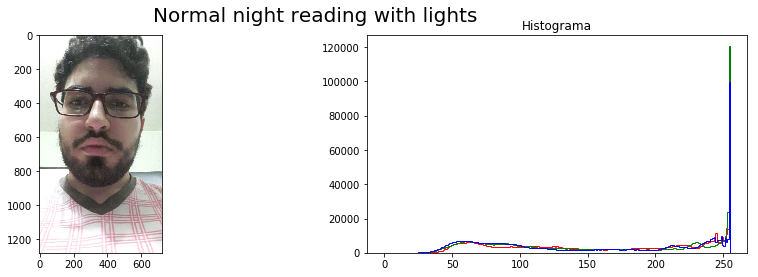

In [29]:
printImageAndHist("res/test0.jpeg", 'Normal night reading with lights')

C:\Users\DavidChaverraMunera\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


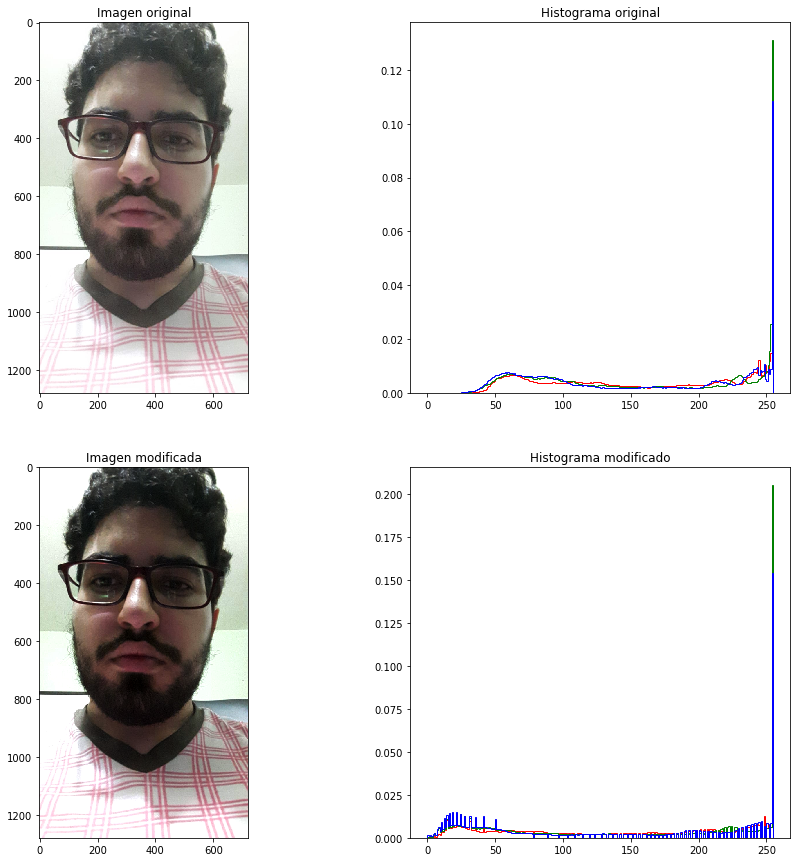

In [30]:
def apply_f_on_rgb(img, f, args):
    
    res = np.zeros(img.shape, np.uint8)
    res[:,:,0] = f(img[:,:,0], *args)
    res[:,:,1] = f(img[:,:,1], *args)
    res[:,:,2] = f(img[:,:,2], *args)
    
    return res

def non_linear_parabola(img, a, b, c):
    
    img_copy = img.astype(np.float32)/255.0
    res_a = cv2.pow(img_copy,2)
    res_a = cv2.multiply(res_a,a)
    res_b = cv2.multiply(img_copy,b)
    res = cv2.add(res_a, res_b)
    res = cv2.add(res, c)
    res[res < 0 ] = 0
    res = res*255
    res[res > 255] = 255
    res = res.astype(np.uint8)
    
    return res

img = cv2.cvtColor(cv2.imread('res/test0.jpeg'), cv2.COLOR_BGR2RGB)

a = 0.7
b = 0.4
c = -0.05


res = apply_f_on_rgb(img, non_linear_parabola, [a, b, c])

fig, arreglo_plots = plt.subplots(2,2, figsize=(15, 15))
colors = ('r','g','b')

arreglo_plots[0,0].set_title('Imagen original')
arreglo_plots[0,0].imshow(img, cmap="gray")
arreglo_plots[0,1].set_title('Histograma original')
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])

arreglo_plots[1,0].set_title('Imagen modificada')
arreglo_plots[1,0].imshow(res, cmap="gray")
arreglo_plots[1,1].set_title('Histograma modificado')
for i,col in enumerate(colors):
    img_array_i = res[:,:,i].ravel()
    arreglo_plots[1,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])

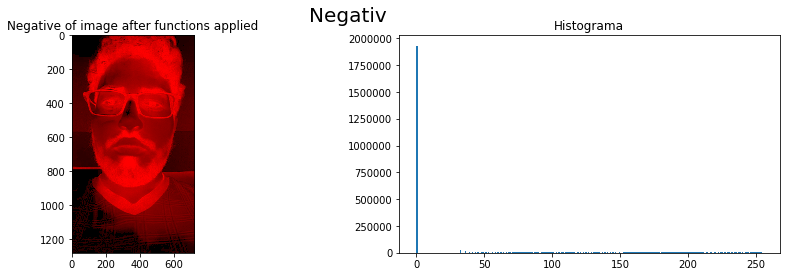

In [36]:
img_t = res
printNegativeImage(img_t, maintTitle = 'Negativ', imgTitle='Negative of image after functions applied', subs = 0, add = 0)

C:\Users\DavidChaverraMunera\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 432x288 with 0 Axes>

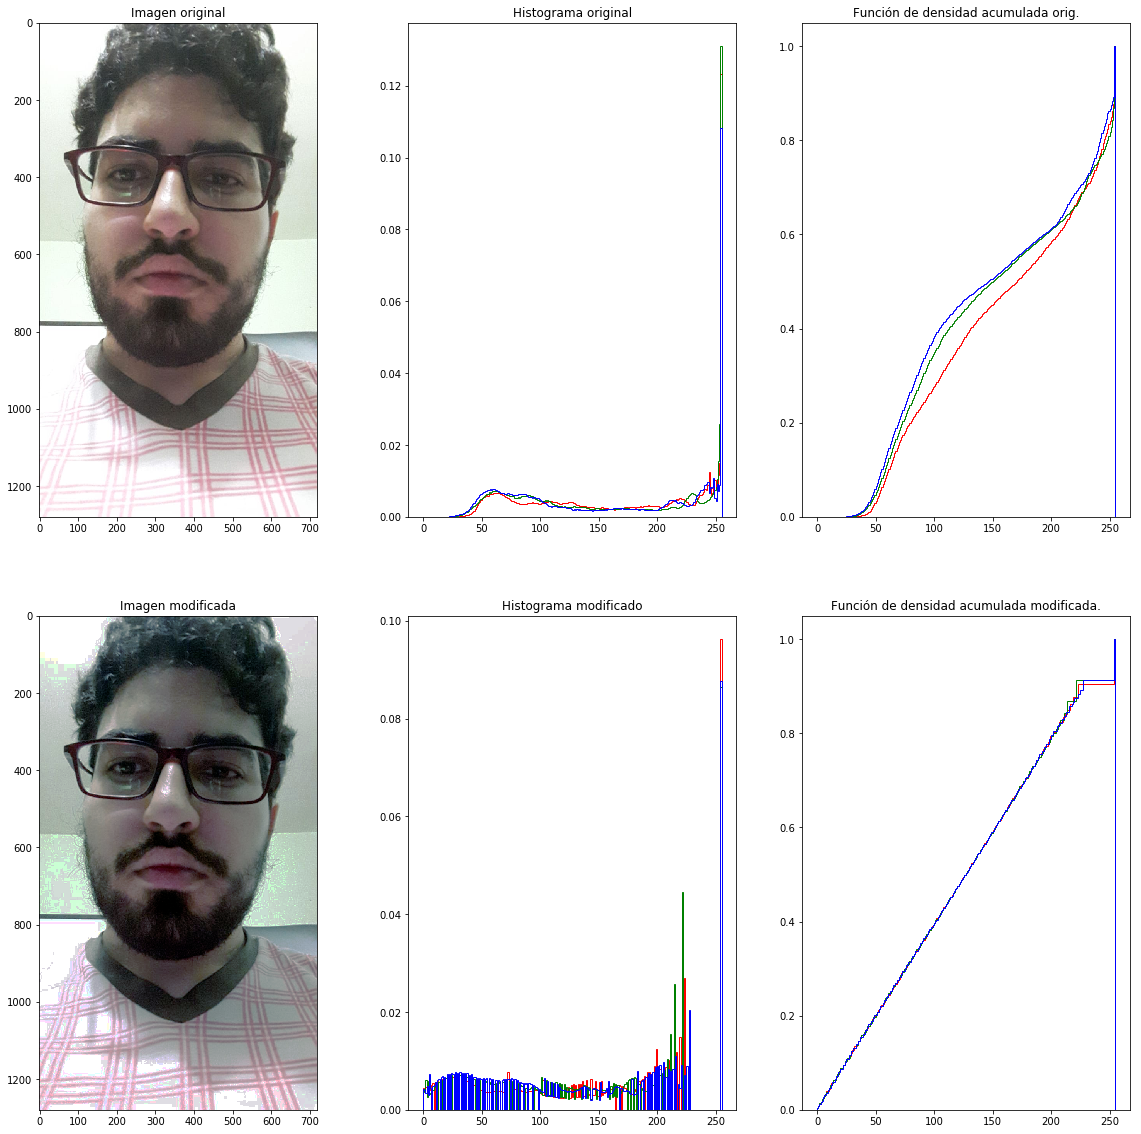

In [35]:
def histogram_equalization(img):
    
    res = np.zeros(img.shape, np.float32)
    img_raveled = img.ravel()
    hist_norm = plt.hist(img_raveled, bins=255, range=(0.0, 255.0), normed=True)
    plt.clf()
    pdf = hist_norm[0]
    np.append(pdf, 1.0 - np.sum(pdf))
    cdf = [np.sum(pdf[0:x]) for x in range(0,256)]
    gmin = np.min(img)
    gmin = 0
    gmax = np.max(img)
    gmax = 255
    for g in range(0,256):
        res[img == g] = (gmax - gmin)*cdf[g] + gmin

    res[res<0] = 0
    res[res>255] = 255
    res = res.astype(np.uint8)
    return res

    
img = cv2.cvtColor(cv2.imread('res/test0.jpeg'), cv2.COLOR_BGR2RGB)
res = apply_f_on_rgb(img, histogram_equalization, [])

fig, arreglo_plots = plt.subplots(2,3, figsize=(20, 20))
colors = ('r','g','b')

arreglo_plots[0,0].set_title('Imagen original')
arreglo_plots[0,0].imshow(img, cmap="gray")
arreglo_plots[0,1].set_title('Histograma original')
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])
arreglo_plots[0,2].set_title('Función de densidad acumulada orig.')  
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,2].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i], cumulative = True)


arreglo_plots[1,0].set_title('Imagen modificada')
arreglo_plots[1,0].imshow(res, cmap="gray")
arreglo_plots[1,1].set_title('Histograma modificado')
for i,col in enumerate(colors):
    img_array_i = res[:,:,i].ravel()
    arreglo_plots[1,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i], cumulative = False)
arreglo_plots[1,2].set_title('Función de densidad acumulada modificada.')  
for i,col in enumerate(colors):
    img_array_i = res[:,:,i].ravel()
    arreglo_plots[1,2].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i], cumulative = True)

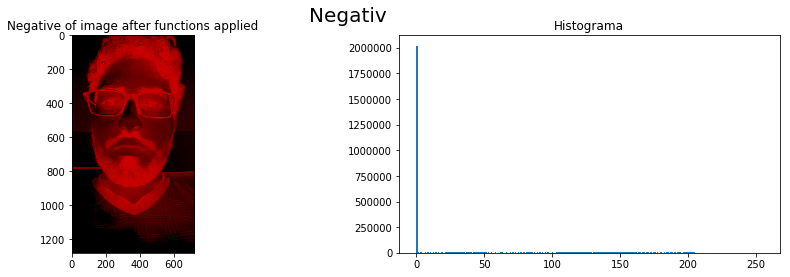

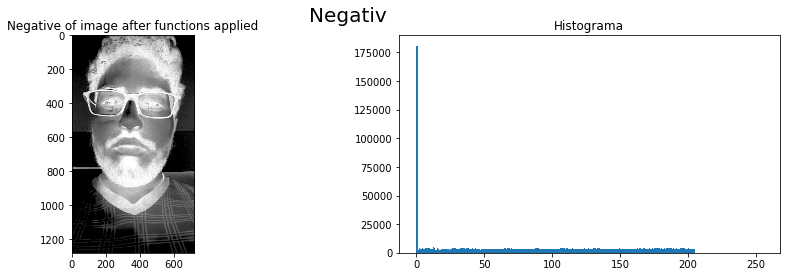

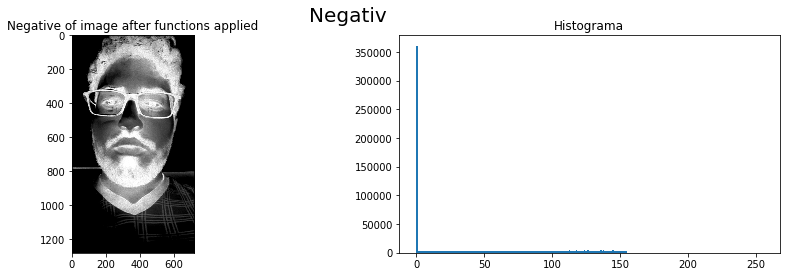

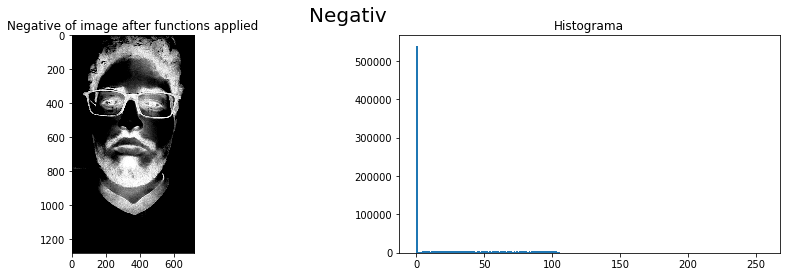

In [46]:
img_t = res

img_g = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)

printNegativeImage(img_t, maintTitle = 'Negativ', 
                   imgTitle='Negative of image after functions applied', subs = 50, add = 0)

printNegativeImage(img_g, maintTitle = 'Negativ', 
                   imgTitle='Negative of image after functions applied', subs = 50, add = 0)

printNegativeImage(img_g, maintTitle = 'Negativ', 
                   imgTitle='Negative of image after functions applied', subs = 100, add = 0)

printNegativeImage(img_g, maintTitle = 'Negativ', 
                   imgTitle='Negative of image after functions applied', subs = 150, add = 0)